## Principal Component Analysis

In [1]:
import numpy as np
import pandas as pd
import pandas.io.data as web
from sklearn.decomposition import KernelPCA

d:\Anaconda2\lib\site-packages\pandas\io\data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


### DAX Index and its 30 Stocks

In [2]:
#symbols = ['ADS.DE', 'ALV.DE', 'BAS.DE', 'BAYN.DE', 'BEI.DE',
#           'BMW.DE', 'CBK.DE', 'CON.DE', 'DAI.DE', 'DB1.DE',
#           'DBK.DE', 'DPW.DE', 'DTE.DE', 'EOAN.DE', 'FME.DE',
#           'FRE.DE', 'HEI.DE', 'HEN3.DE', 'IFX.DE', 'LHA.DE',
#           'LIN.DE', 'LXS.DE', 'MRK.DE', 'MUV2.DE', 'RWE.DE',
#           'SAP.DE', 'SDF.DE', 'SIE.DE', 'TKA.DE', 'VOW3.DE',
#           '^GDAXI']

In [3]:
symbols = ['ADS.DE', 'ALV.DE', 'BAS.DE', 'BAYN.DE', 'BEI.DE',
           'BMW.DE', 'CBK.DE', 'CON.DE', 'DAI.DE', 'DB1.DE',
           'DBK.DE', 'DPW.DE', 'DTE.DE',  'FME.DE',
           'FRE.DE', 'HEI.DE', 'HEN3.DE', 'IFX.DE', 'LHA.DE',
           'LIN.DE', 'LXS.DE', 'MUV2.DE', 'RWE.DE',
           'SAP.DE', 'SDF.DE', 'SIE.DE', 'TKA.DE', 'VOW3.DE',
           '^GDAXI']

In [4]:
#%%time
#data = pd.DataFrame()
#for sym in symbols:
#    data[sym] = web.DataReader(sym, data_source='yahoo')['Close']
#data = data.dropna()

In [5]:
dates = pd.date_range('20160101',periods=257)
dates

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2016-09-04', '2016-09-05', '2016-09-06', '2016-09-07',
               '2016-09-08', '2016-09-09', '2016-09-10', '2016-09-11',
               '2016-09-12', '2016-09-13'],
              dtype='datetime64[ns]', length=257, freq='D')

In [6]:
cls4 = pd.read_csv('data/4Close.csv',header=None)
my_matrix = cls4.as_matrix(columns=None)
my_matrix

array([[   186.35,    196.45,     91.05, ...,     22.99,    144.5 ,
         12953.41],
       [   187.4 ,    197.  ,     90.11, ...,     23.5 ,    145.5 ,
         13013.19],
       [   187.  ,    196.2 ,     91.  , ...,     23.5 ,    142.2 ,
         13003.14],
       ..., 
       [   149.7 ,    141.9 ,     80.52, ...,     21.  ,    125.95,
         11166.42],
       [   149.65,    142.95,     80.16, ...,     21.46,    125.65,
         11165.42],
       [   149.4 ,    142.6 ,     79.58, ...,     21.35,    126.  ,
         11164.42]])

In [7]:
data = pd.DataFrame(my_matrix,index=dates,columns=['ADS', 'ALV', 'BAS', 'BAYN', 'BEI','BMW', 'CBK', 'CON', 'DAI', 'DB1','DBK', 'DPW', 'DTE', 'FME','FRE', 'HEI', 'HEN3', 'IFX', 'LHA','LIN', 'LXS', 'MUV2', 'RWE','SAP', 'SDF', 'SIE', 'TKA', 'VOW3','^GDAXI'])
data.tail()

,ADS,ALV,BAS,BAYN,BEI,BMW,CBK,CON,DAI,DB1,...,LIN,LXS,MUV2,RWE,SAP,SDF,SIE,TKA,VOW3,^GDAXI
2016-09-09,147.10,141.05,78.95,90.79,79.40,78.32,6.09,172.55,64.12,67.92,...,148.05,57.33,175.30,14.24,78.52,18.24,102.00,20.50,123.65,11168.42
2016-09-10,149.40,142.00,80.30,90.29,80.20,79.37,6.19,174.55,64.91,68.07,...,150.30,58.33,176.60,14.46,80.24,18.43,103.45,21.09,125.20,11167.42
2016-09-11,149.70,141.90,80.52,90.72,80.14,80.17,6.30,175.40,65.34,68.01,...,151.20,57.47,176.45,14.13,80.66,18.64,103.55,21.00,125.95,11166.42
2016-09-12,149.65,142.95,80.16,90.73,80.17,79.92,6.30,174.80,65.45,67.67,...,146.50,57.82,179.15,14.20,80.70,18.62,104.25,21.46,125.65,11165.42
2016-09-13,149.40,142.60,79.58,90.17,80.50,80.07,6.26,173.90,65.22,67.48,...,146.15,57.50,177.95,14.31,80.82,18.60,106.50,21.35,126.00,11164.42


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 257 entries, 2016-01-01 to 2016-09-13
Freq: D
Data columns (total 29 columns):
ADS       257 non-null float64
ALV       257 non-null float64
BAS       257 non-null float64
BAYN      257 non-null float64
BEI       257 non-null float64
BMW       257 non-null float64
CBK       257 non-null float64
CON       257 non-null float64
DAI       257 non-null float64
DB1       257 non-null float64
DBK       257 non-null float64
DPW       257 non-null float64
DTE       257 non-null float64
FME       257 non-null float64
FRE       257 non-null float64
HEI       257 non-null float64
HEN3      257 non-null float64
IFX       257 non-null float64
LHA       257 non-null float64
LIN       257 non-null float64
LXS       257 non-null float64
MUV2      257 non-null float64
RWE       257 non-null float64
SAP       257 non-null float64
SDF       257 non-null float64
SIE       257 non-null float64
TKA       257 non-null float64
VOW3      257 non-null float64


In [9]:
data.head()

,ADS,ALV,BAS,BAYN,BEI,BMW,CBK,CON,DAI,DB1,...,LIN,LXS,MUV2,RWE,SAP,SDF,SIE,TKA,VOW3,^GDAXI
2016-01-01,186.35,196.45,91.05,114.45,90.96,85.46,12.16,212.95,69.25,90.48,...,182.55,67.29,186.40,20.62,95.49,20.64,115.15,22.99,144.50,12953.41
2016-01-02,187.40,197.00,90.11,116.25,91.10,86.42,12.11,214.15,69.40,90.30,...,182.90,67.31,185.95,21.30,95.33,20.73,115.95,23.50,145.50,13013.19
2016-01-03,187.00,196.20,91.00,117.25,92.00,86.01,11.43,212.35,68.76,92.21,...,183.05,67.69,186.05,21.41,95.99,20.82,116.50,23.50,142.20,13003.14
2016-01-04,187.25,197.00,90.45,117.95,92.02,86.30,11.61,213.50,68.36,92.83,...,178.95,68.06,188.35,21.45,95.22,20.94,115.90,23.34,141.55,12991.28
2016-01-05,186.85,195.95,90.05,118.70,93.08,87.41,11.68,213.05,68.94,91.05,...,173.35,66.45,186.70,21.37,95.60,20.66,117.40,23.42,143.20,12990.10


In [10]:
dax = pd.DataFrame(data.pop('^GDAXI'))
#dax = pd.DataFrame(data.pop('ADS'))

In [11]:
data[data.columns[:6]].head()

,ADS,ALV,BAS,BAYN,BEI,BMW
2016-01-01,186.35,196.45,91.05,114.45,90.96,85.46
2016-01-02,187.40,197.00,90.11,116.25,91.10,86.42
2016-01-03,187.00,196.20,91.00,117.25,92.00,86.01
2016-01-04,187.25,197.00,90.45,117.95,92.02,86.30
2016-01-05,186.85,195.95,90.05,118.70,93.08,87.41


### Applying PCA

In [12]:
scale_function = lambda x: (x - x.mean()) / x.std()

In [13]:
pca = KernelPCA().fit(data.apply(scale_function))

In [14]:
len(pca.lambdas_)

152

In [15]:
pca.lambdas_[:10].round()

array([ 3608.,  1717.,   564.,   357.,   248.,   176.,   112.,    75.,
          57.,    53.])

In [16]:
get_we = lambda x: x / x.sum()

In [17]:
get_we(pca.lambdas_)[:10]

array([ 0.50336009,  0.23957398,  0.07871044,  0.04980491,  0.03454329,
        0.02449156,  0.01561542,  0.01052413,  0.00801153,  0.00741642])

In [18]:
get_we(pca.lambdas_)[:5].sum()

0.90599270711861257

### Constructing a PCA Index

In [19]:
pca = KernelPCA(n_components=1).fit(data.apply(scale_function))
dax['PCA_1'] = pca.transform(-data)

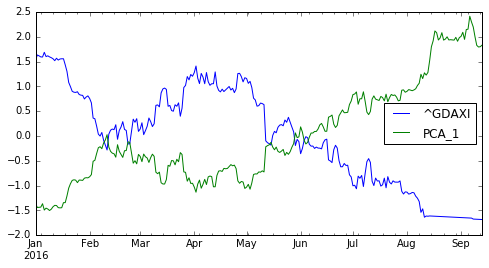

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
dax.apply(scale_function).plot(figsize=(8, 4))
# tag: pca_1
# title: German DAX index and PCA index with 1 component

In [21]:
pca = KernelPCA(n_components=5).fit(data.apply(scale_function))
pca_components = pca.transform(-data)
weights = get_we(pca.lambdas_)
dax['PCA_5'] = np.dot(pca_components, weights)

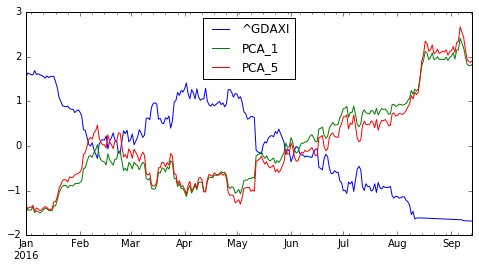

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
dax.apply(scale_function).plot(figsize=(8, 4))
# tag: pca_2
# title: German DAX index and PCA indices with 1 and 5 components

In [23]:
import matplotlib as mpl
mpl_dates = mpl.dates.date2num(data.index.to_pydatetime())
mpl_dates

array([ 735964.,  735965.,  735966.,  735967.,  735968.,  735969.,
        735970.,  735971.,  735972.,  735973.,  735974.,  735975.,
        735976.,  735977.,  735978.,  735979.,  735980.,  735981.,
        735982.,  735983.,  735984.,  735985.,  735986.,  735987.,
        735988.,  735989.,  735990.,  735991.,  735992.,  735993.,
        735994.,  735995.,  735996.,  735997.,  735998.,  735999.,
        736000.,  736001.,  736002.,  736003.,  736004.,  736005.,
        736006.,  736007.,  736008.,  736009.,  736010.,  736011.,
        736012.,  736013.,  736014.,  736015.,  736016.,  736017.,
        736018.,  736019.,  736020.,  736021.,  736022.,  736023.,
        736024.,  736025.,  736026.,  736027.,  736028.,  736029.,
        736030.,  736031.,  736032.,  736033.,  736034.,  736035.,
        736036.,  736037.,  736038.,  736039.,  736040.,  736041.,
        736042.,  736043.,  736044.,  736045.,  736046.,  736047.,
        736048.,  736049.,  736050.,  736051.,  736052.,  7360

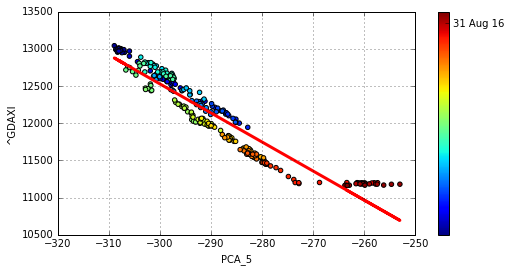

In [24]:
plt.figure(figsize=(8, 4))
plt.scatter(dax['PCA_5'], dax['^GDAXI'], c=mpl_dates)
lin_reg = np.polyval(np.polyfit(dax['PCA_5'],
                                dax['^GDAXI'], 1),
                                dax['PCA_5'])
plt.plot(dax['PCA_5'], lin_reg, 'r', lw=3)
plt.grid(True)
plt.xlabel('PCA_5')
plt.ylabel('^GDAXI')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),
                format=mpl.dates.DateFormatter('%d %b %y'))
# tag: pca_3
# title: DAX return values against PCA return values with linear regression

In [25]:
#cut_date = '2011/7/1'
cut_date = '2016/7/1'
early_pca = dax[dax.index < cut_date]['PCA_5']
early_reg = np.polyval(np.polyfit(early_pca,
                dax['^GDAXI'][dax.index < cut_date], 1),
                early_pca)

In [26]:
late_pca = dax[dax.index >= cut_date]['PCA_5']
late_reg = np.polyval(np.polyfit(late_pca,
                dax['^GDAXI'][dax.index >= cut_date], 1),
                late_pca)

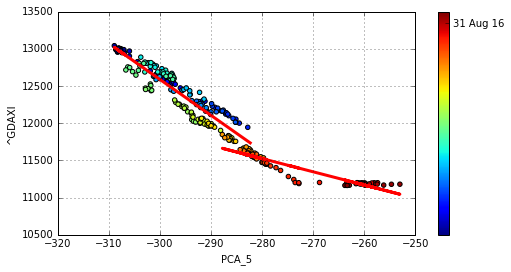

In [27]:
plt.figure(figsize=(8, 4))
plt.scatter(dax['PCA_5'], dax['^GDAXI'], c=mpl_dates)
plt.plot(early_pca, early_reg, 'r', lw=3)
plt.plot(late_pca, late_reg, 'r', lw=3)
plt.grid(True)
plt.xlabel('PCA_5')
plt.ylabel('^GDAXI')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),
                format=mpl.dates.DateFormatter('%d %b %y'))
# tag: pca_7
# title: DAX index values against PCA index values with early and late regression (regime switch)

## Bayesian Regression

### Bayes' Formula

### PyMC3

In [28]:
#  conda install pymc
#  conda install pymc3
import warnings
warnings.simplefilter('ignore')
#import pymc as pm
import pymc3 as pm
import numpy as np
np.random.seed(1000)
import matplotlib.pyplot as plt
%matplotlib inline

### Introductory Example

In [29]:
#x = np.linspace(0, 10, 500)
#y = 4 + 2 * x + np.random.standard_normal(len(x)) * 2

In [30]:
#reg = np.polyfit(x, y, 1)
  # linear regression

In [31]:
#plt.figure(figsize=(8, 4))
#plt.scatter(x, y, c=y, marker='v')
#plt.plot(x, reg[1] + reg[0] * x, lw=2.0)
#plt.colorbar()
#plt.grid(True)
#plt.xlabel('x')
#plt.ylabel('y')
# tag: pm_fig_0
# title: Sample data points a regresion line
# size: 90

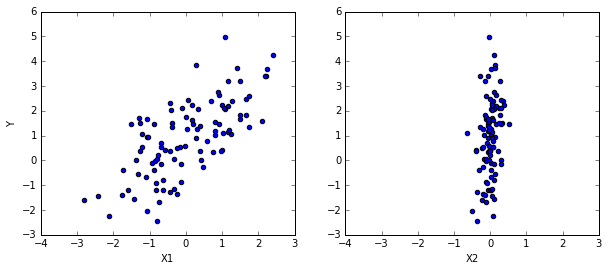

In [32]:
# URL  http://docs.pymc.io/notebooks/getting_started.html
#reg
%matplotlib inline
# Initialize random number generator
np.random.seed(123)

# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].scatter(X1, Y)
axes[1].scatter(X2, Y)
axes[0].set_ylabel('Y'); axes[0].set_xlabel('X1'); axes[1].set_xlabel('X2');

In [33]:
#with pm.Model() as model: 
        # model specifications in PyMC3
        # are wrapped in a with-statement
    # define priors
    #alpha = pm.Normal('alpha', mu=0, sd=20)
    #beta = pm.Normal('beta', mu=0, sd=20)
    
    #sigma = pm.Uniform('sigma', lower=0, upper=10)
    
    # define linear regression
    #y_est = alpha + beta * x
    
    # define likelihood
    #likelihood = pm.Normal('y', mu=y_est, sd=sigma, observed=y)
    
    # inference
    #start = pm.find_MAP()
      # find starting value by optimization
    #step = pm.NUTS(state=start)
      # instantiate MCMC sampling algorithm
    #trace = pm.sample(100, step, start=start, progressbar=False)
      # draw 100 posterior samples using NUTS sampling
        

In [34]:
basic_model = pm.Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10, shape=2)
    sigma = pm.HalfNormal('sigma', sd=1)

    # Expected value of outcome
    mu = alpha + beta[0]*X1 + beta[1]*X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

In [35]:
map_estimate = pm.find_MAP(model=basic_model)

map_estimate

logp = -149.58, ||grad|| = 12.242: 100%|█████| 19/19 [00:00<00:00, 1266.66it/s]


{'alpha': array(0.9066009314912589),
 'beta': array([ 0.94848596,  2.60711845]),
 'sigma': array(0.9629885768973849),
 'sigma_log__': array(-0.037713729250850515)}

In [36]:
#trace[0]
from scipy import optimize

map_estimate = pm.find_MAP(model=basic_model, fmin=optimize.fmin_powell)

map_estimate

logp = -149.47:   3%|▋                    | 170/5000 [00:00<00:01, 4146.33it/s]

Optimization terminated successfully.
         Current function value: 148.984564
         Iterations: 4
         Function evaluations: 176


logp = -149.47:   4%|▋                    | 176/5000 [00:00<00:01, 2626.87it/s]


{'alpha': array(0.9090796395146041),
 'beta': array([ 0.9514399 ,  2.61452795]),
 'sigma': array(0.9656806239373911),
 'sigma_log__': array(-0.0349221164775208)}

In [37]:
#fig = pm.traceplot(trace, lines={'alpha': 4, 'beta': 2, 'sigma': 2})
#plt.figure(figsize=(8, 8))
# tag: pm_fig_1
# title: Trace plots for alpha, beta and sigma
# size: 90
from scipy import optimize

with basic_model:
    # draw 500 posterior samples
    trace = pm.sample()

100%|████████████████████████████████████| 1000/1000 [00:00<00:00, 1221.00it/s]


In [38]:
#plt.figure(figsize=(8, 4))
#plt.scatter(x, y, c=y, marker='v')
#plt.colorbar()
#plt.grid(True)
#plt.xlabel('x')
#plt.ylabel('y')
#for i in range(len(trace)):
#    plt.plot(x, trace['alpha'][i] + trace['beta'][i] * x)
# tag: pm_fig_2
# title: Sample data and regression lines from Bayesian regression
# size: 90

In [39]:
trace['alpha'][-5:]

array([ 0.91876296,  0.87876934,  0.95650741,  0.94203054,  1.0249928 ])

In [40]:
with basic_model:

    # obtain starting values via MAP
    start = pm.find_MAP(fmin=optimize.fmin_powell)

    # instantiate sampler
    step = pm.Slice()

    # draw 5000 posterior samples
    trace = pm.sample(5000, step=step, start=start)

logp = -149.47:   3%|▋                    | 170/5000 [00:00<00:01, 4250.00it/s]

Optimization terminated successfully.
         Current function value: 148.984564
         Iterations: 4
         Function evaluations: 176


100%|█████████████████████████████████████| 5500/5500 [00:07<00:00, 785.60it/s]


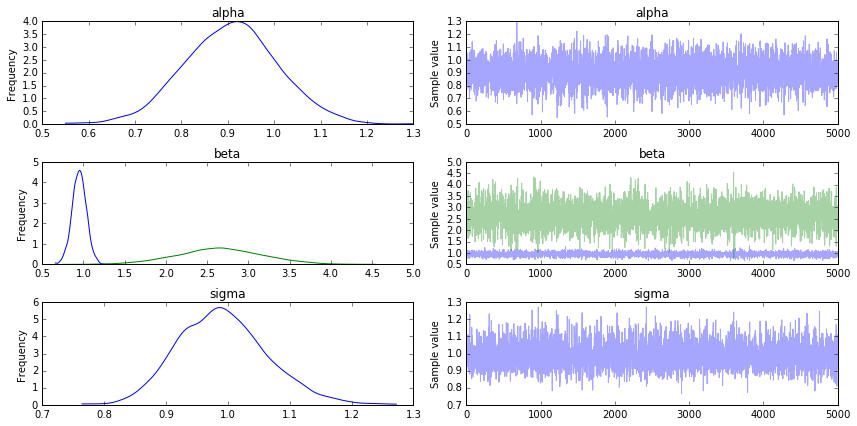

In [41]:
_ = pm.traceplot(trace)

In [42]:
pm.summary(trace)


alpha:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.906            0.100            0.001            [0.717, 1.109]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.709          0.839          0.907          0.971          1.102


beta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.948            0.086            0.001            [0.766, 1.110]
  2.655            0.514            0.008            [1.646, 3.670]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.775          0.891          0.948          1.005          1.120
  1.647          2.322          2.653   

In [43]:
# Case study 1: Stochastic volatility
from pandas_datareader import data
import pandas as pd

returns = data.get_data_yahoo('SPY', start='2008-5-1', end='2009-12-1')['Close'].pct_change()

len(returns)

402

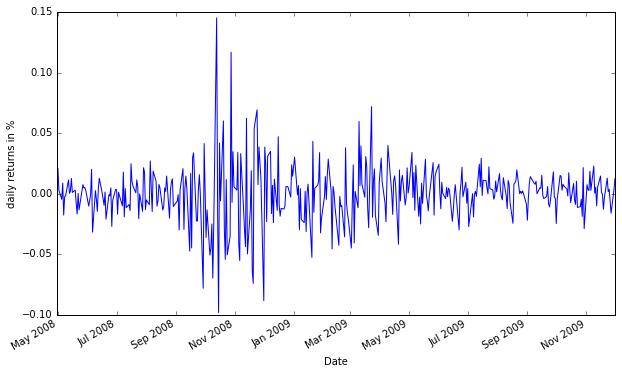

In [44]:
returns.plot(figsize=(10, 6))
plt.ylabel('daily returns in %');

In [45]:
with pm.Model() as sp500_model:
    nu = pm.Exponential('nu', 1./10, testval=5.)
    sigma = pm.Exponential('sigma', 1./.02, testval=.1)

    s = pm.GaussianRandomWalk('s', sigma**-2, shape=len(returns))
    volatility_process = pm.Deterministic('volatility_process', pm.math.exp(-2*s))

    r = pm.StudentT('r', nu, lam=1/volatility_process, observed=returns)

In [46]:
with sp500_model:
    trace = pm.sample(500)  #2000

100%|██████████████████████████████████████| 1000/1000 [00:44<00:00, 22.60it/s]


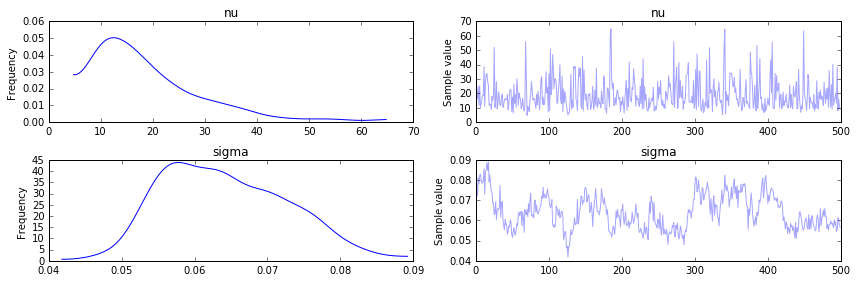

In [47]:
pm.traceplot(trace, [nu, sigma]);

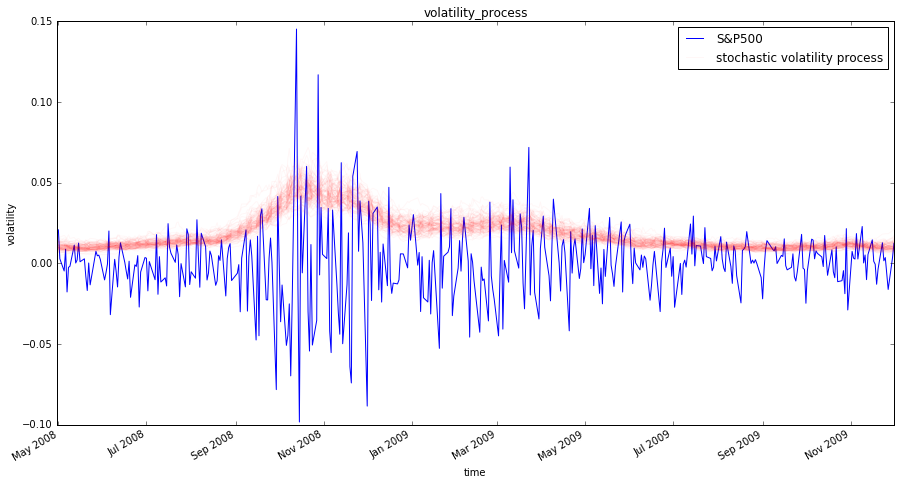

In [48]:
fig, ax = plt.subplots(figsize=(15, 8))
returns.plot(ax=ax)
ax.plot(returns.index, 1/np.exp(trace['s',::5].T), 'r', alpha=.03);
ax.set(title='volatility_process', xlabel='time', ylabel='volatility');
ax.legend(['S&P500', 'stochastic volatility process'])

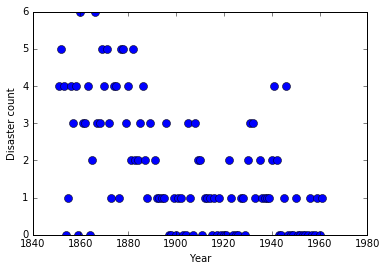

In [49]:
#Case study 2: Coal mining disasters
disaster_data = np.ma.masked_values([4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6,
                            3, 3, 5, 4, 5, 3, 1, 4, 4, 1, 5, 5, 3, 4, 2, 5,
                            2, 2, 3, 4, 2, 1, 3, -999, 2, 1, 1, 1, 1, 3, 0, 0,
                            1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1,
                            0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2,
                            3, 3, 1, -999, 2, 1, 1, 1, 1, 2, 4, 2, 0, 0, 1, 4,
                            0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1], value=-999)
year = np.arange(1851, 1962)

plt.plot(year, disaster_data, 'o', markersize=8);
plt.ylabel("Disaster count")
plt.xlabel("Year")

In [50]:
with pm.Model() as disaster_model:

    switchpoint = pm.DiscreteUniform('switchpoint', lower=year.min(), upper=year.max(), testval=1900)

    # Priors for pre- and post-switch rates number of disasters
    early_rate = pm.Exponential('early_rate', 1)
    late_rate = pm.Exponential('late_rate', 1)

    # Allocate appropriate Poisson rates to years before and after current
    rate = pm.math.switch(switchpoint >= year, early_rate, late_rate)

    disasters = pm.Poisson('disasters', rate, observed=disaster_data)

In [51]:
with disaster_model:
    trace = pm.sample(2000) #10000

100%|█████████████████████████████████████| 2500/2500 [00:09<00:00, 256.41it/s]


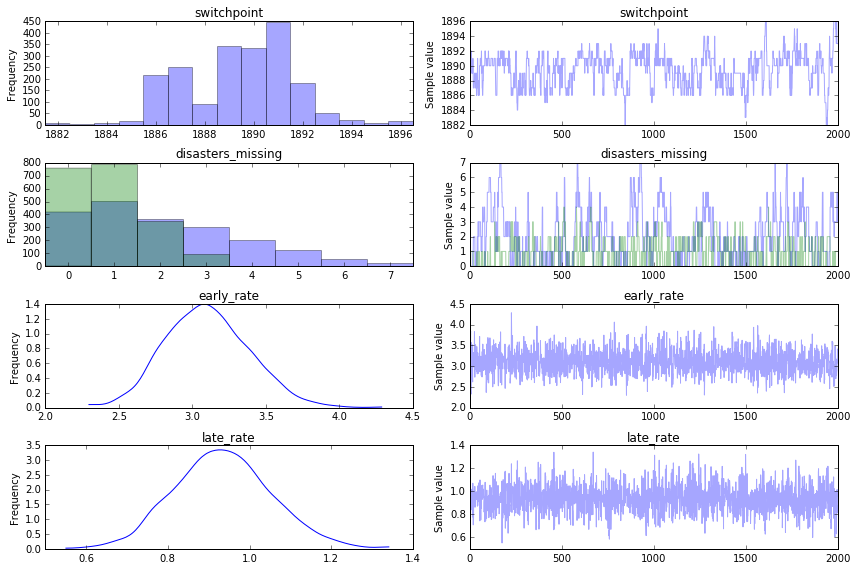

In [52]:
pm.traceplot(trace);

In [53]:
#Arbitrary deterministics
import theano.tensor as tt
from theano.compile.ops import as_op

@as_op(itypes=[tt.lscalar], otypes=[tt.lscalar])
def crazy_modulo3(value):
    if value > 0:
        return value % 3
    else :
        return (-value + 1) % 3

with pm.Model() as model_deterministic:
    a = pm.Poisson('a', 1)
    b = crazy_modulo3(a)

In [54]:
class Beta(pm.Continuous):
    def __init__(self, mu, *args, **kwargs):
        super(Beta, self).__init__(*args, **kwargs)
        self.mu = mu
        self.mode = mu

    def logp(self, value):
        mu = self.mu
        return beta_logp(value - mu)


def beta_logp(value):
    return -1.5 * np.log(1 + (value)**2)


with pm.Model() as model:
    beta = Beta('slope', mu=0, testval=0)

In [55]:
# Convert X and Y to a pandas DataFrame
import pandas

df = pandas.DataFrame({'x1': X1, 'x2': X2, 'y': Y})

In [56]:
from pymc3.glm import GLM

with pm.Model() as model_glm:
    GLM.from_formula('y ~ x1 + x2', df)
    trace = pm.sample()

100%|████████████████████████████████████| 1000/1000 [00:00<00:00, 1242.24it/s]


In [57]:
from pymc3.glm.families import Binomial

df_logistic = pandas.DataFrame({'x1': X1, 'y': Y > np.median(Y)})

with pm.Model() as model_glm_logistic:
    GLM.from_formula('y ~ x1', df_logistic, family=Binomial())

### Real Data

In [58]:
# conda install -c Quantopian zipline
import warnings
warnings.simplefilter('ignore')
import zipline
import pytz
import datetime as dt
#from zipline import TradingAlgorithm
#from zipline.transforms import MovingAverage
#from zipline.utils.factory import load_from_yahoo
from zipline.data.loader import load_from_yahoo

In [59]:
#data = zipline.data.load_from_yahoo(stocks=['GLD', 'GDX'], 
data = load_from_yahoo(stocks=['GLD', 'GDX'], 
         end=dt.datetime(2014, 3, 15, 0, 0, 0, 0, pytz.utc)).dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1967 entries, 2006-05-22 to 2014-03-14
Data columns (total 2 columns):
GDX    1967 non-null float64
GLD    1967 non-null float64
dtypes: float64(2)
memory usage: 46.1 KB


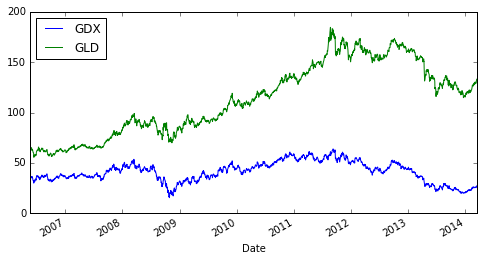

In [60]:
data.plot(figsize=(8, 4))
# tag: zip_fig_1
# title: Co-movements of traiding pair
# size: 90

In [61]:
data.ix[-1] / data.ix[0] - 1

GDX   -0.215999
GLD    1.038285
dtype: float64

In [62]:
data.corr()

,GDX,GLD
GDX,1.00000,0.46696
GLD,0.46696,1.00000


In [63]:
data.index

DatetimeIndex(['2006-05-22', '2006-05-23', '2006-05-24', '2006-05-25',
               '2006-05-26', '2006-05-30', '2006-05-31', '2006-06-01',
               '2006-06-02', '2006-06-05',
               ...
               '2014-03-03', '2014-03-04', '2014-03-05', '2014-03-06',
               '2014-03-07', '2014-03-10', '2014-03-11', '2014-03-12',
               '2014-03-13', '2014-03-14'],
              dtype='datetime64[ns, UTC]', name=u'Date', length=1967, freq=None)

In [64]:
import matplotlib as mpl
mpl_dates = mpl.dates.date2num(data.index.to_pydatetime())
mpl_dates

array([ 732453.,  732454.,  732455., ...,  735304.,  735305.,  735306.])

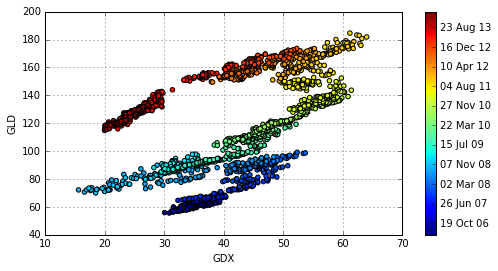

In [65]:
plt.figure(figsize=(8, 4))
plt.scatter(data['GDX'], data['GLD'], c=mpl_dates, marker='o')
plt.grid(True)
plt.xlabel('GDX')
plt.ylabel('GLD')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),
             format=mpl.dates.DateFormatter('%d %b %y'))
# tag: zip_fig_2
# title: Scatter plot of prices for GLD and GDX
# size: 90

In [66]:
#with pm.Model() as model:
#    alpha = pm.Normal('alpha', mu=0, sd=20)
#    beta = pm.Normal('beta', mu=0, sd=20)
#    sigma = pm.Uniform('sigma', lower=0, upper=50)
    
#    y_est = alpha + beta * data['GDX'].values
    
#    likelihood = pm.Normal('GLD', mu=y_est, sd=sigma,
#                           observed=data['GLD'].values)
    
#    start = pm.find_MAP()
#    step = pm.NUTS(state=start)
#    trace = pm.sample(100, step, start=start, progressbar=False)

In [67]:
#fig = pm.traceplot(trace)
#plt.figure(figsize=(8, 8))
# tag: zip_fig_3
# title: Trace plots for alpha, beta and sigma based on GDX and GLD data
# size: 90

In [68]:
#plt.figure(figsize=(8, 4))
#plt.scatter(data['GDX'], data['GLD'], c=mpl_dates, marker='o')
#plt.grid(True)
#plt.xlabel('GDX')
#plt.ylabel('GLD')
#for i in range(len(trace)):
#    plt.plot(data['GDX'], trace['alpha'][i] + trace['beta'][i] * data['GDX'])
#plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),
#             format=mpl.dates.DateFormatter('%d %b %y'))
# tag: zip_fig_4
# title: Scatter plot with "simple" regression lines
# size: 90

In [69]:
#model_randomwalk = pm.Model()
#with model_randomwalk:
    # std of random walk best sampled in log space
#    sigma_alpha, log_sigma_alpha = \
#            model_randomwalk.TransformedVar('sigma_alpha', 
#                            pm.Exponential.dist(1. / .02, testval=.1), 
#                            pm.logtransform)
#    sigma_beta, log_sigma_beta = \
#            model_randomwalk.TransformedVar('sigma_beta', 
#                            pm.Exponential.dist(1. / .02, testval=.1),
#                            pm.logtransform)

In [70]:
#conda install timeseries
#from pymc3.distributions.timeseries import GaussianRandomWalk

In [71]:

# to make the model more simple, we will apply the same coefficients
# to 50 data points at a time
#subsample_alpha = 50
#subsample_beta = 50

#with model_randomwalk:
#    alpha = GaussianRandomWalk('alpha', sigma_alpha**-2, 
#                               shape=len(data) / subsample_alpha)
#    beta = GaussianRandomWalk('beta', sigma_beta**-2, 
#                              shape=len(data) / subsample_beta)
    
    # make coefficients have the same length as prices
#    alpha_r = np.repeat(alpha, subsample_alpha)
#    beta_r = np.repeat(beta, subsample_beta)

In [72]:
#from pymc3 import Model, Normal, HalfNormal
#from pymc3 import Exponential, StudentT, exp, Deterministic
#from pymc3.distributions.timeseries import GaussianRandomWalk

#with Model() as sp500_model:

#     nu = Exponential('nu', 1./10, testval=5.)

#     sigma = Exponential('sigma', 1./.02, testval=.1)

#     s = GaussianRandomWalk('s', sigma**-2, shape=len(returns))

#     volatility_process = Deterministic('volatility_process', exp(-2*s))

#     r = StudentT('r', nu, lam=1/volatility_process, observed=returns['S&P500'])

In [73]:
#len(data.dropna().GDX.values)  # a bit longer than 1,950

In [74]:
#with model_randomwalk:
    # define regression
#    regression = alpha_r + beta_r * data.GDX.values[:1950]
    
    # assume prices are normally distributed,
    # the mean comes from the regression
#    sd = pm.Uniform('sd', 0, 20)
#    likelihood = pm.Normal('GLD', 
#                           mu=regression, 
#                           sd=sd, 
#                           observed=data.GLD.values[:1950])

In [75]:
#import scipy.optimize as sco
#with model_randomwalk:
    # first optimize random walk
#    start = pm.find_MAP(vars=[alpha, beta], fmin=sco.fmin_l_bfgs_b)
    
    # sampling
#    step = pm.NUTS(scaling=start)
#    trace_rw = pm.sample(100, step, start=start, progressbar=False)

In [76]:
#np.shape(trace_rw['alpha'])

In [77]:
#part_dates = np.linspace(min(mpl_dates), max(mpl_dates), 39)

In [78]:
#fig, ax1 = plt.subplots(figsize=(10, 5))
#plt.plot(part_dates, np.mean(trace_rw['alpha'], axis=0),
#         'b', lw=2.5, label='alpha')
#for i in range(45, 55):
#    plt.plot(part_dates, trace_rw['alpha'][i], 'b-.', lw=0.75)
#plt.xlabel('date')
#plt.ylabel('alpha')
#plt.axis('tight')
#plt.grid(True)
#plt.legend(loc=2)
#ax1.xaxis.set_major_formatter(mpl.dates.DateFormatter('%d %b %y') )
#ax2 = ax1.twinx()
#plt.plot(part_dates, np.mean(trace_rw['beta'], axis=0),
#         'r', lw=2.5, label='beta')
#for i in range(45, 55):
#    plt.plot(part_dates, trace_rw['beta'][i], 'r-.', lw=0.75)
#plt.ylabel('beta')
#plt.legend(loc=4)
#fig.autofmt_xdate()
# tag: zip_fig_5
# title: Evolution of (mean) alpha and (mean) beta over time (updated estimates over time)
# size: 90

In [79]:
#plt.figure(figsize=(10, 5))
#plt.scatter(data['GDX'], data['GLD'], c=mpl_dates, marker='o')
#plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),
#             format=mpl.dates.DateFormatter('%d %b %y'))
#plt.grid(True)
#plt.xlabel('GDX')
#plt.ylabel('GLD')
#x = np.linspace(min(data['GDX']), max(data['GDX'])) 
#for i in range(39):
#    alpha_rw = np.mean(trace_rw['alpha'].T[i])
#    beta_rw = np.mean(trace_rw['beta'].T[i]) 
#    plt.plot(x, alpha_rw + beta_rw * x, color=plt.cm.jet(256 * i / 39))
# tag: zip_fig_6
# title: Scatter plot with time-dependent regression lines (updated estimates)
# size: 90

## Conclusions

## Further Reading